In [9]:
#Task 1: Simple Michelson
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    laser l1 P=1
    s s1 l1.p1 bs1.p1 L=0.1
    bs bs1 R=0.5 T=0.5 alpha=0
    s sx bs1.p3 m1.p1 L=1.0
    mirror m1 R=1 T=0
    s sy bs1.p2 m2.p1 L=1.0
    mirror m2 R=1 T=0
    pd pd1 bs1.p4.o 
    """
)

    
    


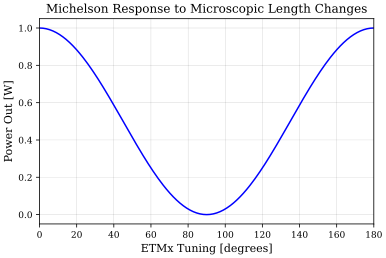

In [10]:
### Task 2: Michelson response to microscopic length changes
#output the power transmitted as the microscopic tuning of ETMx is varied from 0 to 180 degrees. 
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    laser l1 P=1
    s s1 l1.p1 bs1.p1 L=0.1
    bs bs1 R=0.5 T=0.5 alpha=0
    s sx bs1.p3 m1.p1 L=1.0
    mirror m1 R=1 T=0
    s sy bs1.p2 m2.p1 L=1.0
    mirror m2 R=1 T=0
    pd pd1 bs1.p4.o 
   xaxis(m1.phi,lin,0,180,200)
    """
)
kat1 = kat.deepcopy()
out1 = kat1.run()

# Extract the data for plotting
x2 = out1.x[0]  # The first dimension contains the x-axis values
y2 = out1["pd1"]

# Plot the results
plt.figure()
plt.plot(x2, y2)
plt.xlabel('ETMx Tuning [degrees]')
plt.ylabel('Power Out [W]')
plt.title('Michelson Response to Microscopic Length Changes')
plt.grid(True)
plt.show()


In [11]:
print(finesse.syntax("pd"))

pd / PowerDetector / power_detector_dc: pd name node pdtype=none

pd1 / PowerDetectorDemod1 / power_detector_demod_1: pd1 name node f phase=none pdtype=none

pd2 / PowerDetectorDemod2 / power_detector_demod_2: pd2 name node f1 phase1 f2 phase2=none pdtype=noneNone


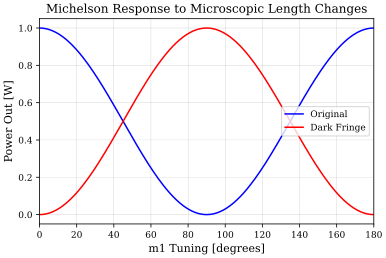

In [9]:
#setting the interferometer to a 'dark fringe'
import finesse
import matplotlib.pyplot as plt
import numpy as np
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    laser l1 P=1
    s s1 l1.p1 bs1.p1 L=0.1
    bs bs1 R=0.5 T=0.5 alpha=0
    s sx bs1.p3 m1.p1 L=1.0
    mirror m1 R=1 T=0
    s sy bs1.p2 m2.p1 L=1.0
    mirror m2 R=1 T=0
    pd pd1 bs1.p4.o 
   xaxis(m1.phi,lin,0,180,200)
    """
)
out1=kat.run()
kat1 = kat.deepcopy()
kat1.bs1.phi = 45

# Run the simulation for the dark fringe setup
kat1.parse("xaxis(m1.phi,lin,0,180,200)")
out2 = kat1.run()

# Extract the data for plotting

x1 = np.asarray(out1.x).flatten()  # Convert tuple to NumPy array and flatten
y1 = out1["pd1"]

x2 = np.asarray(out2.x).flatten()  # Convert tuple to NumPy array and flatten
y2 = out2["pd1"]

# Plot the results
plt.figure()
plt.plot(x1, y1, label='Original')
plt.plot(x2, y2, label='Dark Fringe')
plt.xlabel('m1 Tuning [degrees]')
plt.ylabel('Power Out [W]')
plt.legend(loc=5)
plt.title('Michelson Response to Microscopic Length Changes')
plt.grid(True)
plt.show()

In [13]:
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    laser l1 P=1
    s s1 l1.p1 bs1.p1 L=0.1
    bs bs1 R=0.5 T=0.5 alpha=0
    s sx bs1.p3 m1.p1 L=1.0
    mirror m1 R=1 T=0
    s sy bs1.p2 m2.p1 L=1.0
    mirror m2 R=1 T=0
    pd pd1 bs1.p4.o 
   xaxis(m1.phi,lin,0,180,200)
    """
)
kat1=kat.deepcopy()
kat1.bs1.phi=45
kat1.parse("""
pd pd2 bs1.p1.o
""")
##common arm tuning changes
kat2=kat1.deepcopy()
kat2.parse("""
put m1.phi 
""")






C:\ProgramData\anaconda3\Lib\site-packages\finesse\detectors\general.py:56: UserWarning: Detector node not specified. Assuming 'bs1.p1.i'.
  warn(


KatSyntaxError: 	(use finesse.tb() to see the full traceback)
line 2: illegal character '$'
   1: 
-->2: put m1.phi $x1
                 ^^^^